# MonkeyType Data Report

## Import Statements

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In this report, I will be analyzing typing data. This is really nice because I have been doing typing tests since the beginning of the year. Since I am at my computer typing lots of code and math proofs, it's important to me that I increase my typing speed. This will mean I complete assignments faster and I get more time back in my pocket that I can use in other places. 

Unfortunately, the website that I take my typing tests on (MonkeyType) does not let you download your data very easily. In order for me to get all of my typing data. As such, if you are interested in downloading your own typing data from MonkeyType, this is how I learned to do it:

> **How to Download your Typing Data from MonkeyType**
> 1. Go to your accounts page where you can view all your stats on the website
> 2. Open your console, most web browsers can do this by pressing F12 and then clicking on "Console"
> 3. Type the command `copy(snapshot().results)`. This will copy all of your data since the creation of your account to the clipboard.
> 4. Create a new text document and paste your data. It should be a LOT of lines. Save this text document with the `.json` extension. 


This means that I have one singular but HUGE json file where all of my data is stored.


## Data Attributes

My dataset contains the following attributes:

* ID: Every test has a random string ID that can be used for identification
* WPM: Stands for "words per minute" - the words per minute that I got on that test
* Raw WPM: Typers make mistakes when they type, and mistakes are penalized in the calculation of WPM. The Raw WPM would be the WPM scored if mistakes were not taken into account
* acc: short for "accuracy", this score between 0 and 100 is the percent accurate I was on that test
* mode: whether this was a timed test, a quote test, or somet other form of test
* mode2: the value heree depends on the value in mode
    * IF TIMED TEST: mode2 displays the length of the test
    * IF QUOTE TEST: mode2 displays the number of characters in the quote
* quote length: a bit poorly named in my opinion. a 1 means that the test was a quote test, and a -1 means the test was not a quote test. Not sure what additional information this gives us...
* timestamp: the timestamp for when the test occurred
* restart count: how many times the test was restarted
* incomplete test seconds: the total number of seconds all incompleted tests took
* test duration: how long the test took. This is valuable if you got a quote because different quotes take various amounts of time
* afk duration: how many seconds there wsa no user input
* tags: an array of tags put on the test
* consistency: how consistent my typing speed remained over the course of the entire test
* key consistency: 
* chart data: this is a JSON object containing information about my WPM, errors, and raw WPM at every second of my test
* uid:
* key spacing stats:
* key duration stats:
* ir: this column has been depracated since I started this project
* bailed out: Whether a test was cancelled near the end of a test
* blind mode: Whether blind mode was on/off
* lazy mode: Whether lazy mode was on/off
* difficulty: The difficulty level of the test
* funbox: What type of funbox was used in the test
* language: what language I typed in for that test
* numbers: True if numbers appeared on the test and false otherwise
* punctuation: True if punctuation appeared on the test and false otherwise
* is PB: 1 if the test was a PB at the time, otherwise left blank if there was no PB


## Data Cleaning/Aggregation

Since `pandas` conveniently has a `read_json` function, we can get the data into a DataFrame:

In [3]:
mt_df = pd.read_json('monkey_type_data.json')
print(mt_df)

                          _id     wpm  rawWpm        charStats    acc  mode  \
0    619be623425285ba199b5465  103.80  109.20   [519, 7, 0, 3]  97.44  time   
1    619bdecb425285ba19784be8  102.98  110.38  [515, 14, 2, 2]  94.31  time   
2    619bde01425285ba197279a1  109.38  116.18  [547, 13, 2, 2]  95.72  time   
3    6171d251653e0be59fcc7d40  110.36  117.36   [552, 9, 3, 1]  96.94  time   
4    6168fde0418b06c0ab798403  108.95  114.34   [545, 9, 4, 3]  96.85  time   
..                        ...     ...     ...              ...    ...   ...   
173  61182e7af039809de162d25a   82.80   86.40         [414, 5]  94.65  time   
174  61182e7af039809de162d25b   79.19   80.19         [396, 0]  97.82  time   
175  61182e7af039809de162d25c   85.00   87.00         [425, 4]  96.20  time   
176  61182e7af039809de162d25d   96.40   96.40         [482, 0]  99.59  time   
177  61182e7af039809de162d25e   82.60   85.00         [413, 3]  97.01  time   

     mode2  quoteLength               timestamp  re

Initially looking at this data, there are many columns that are not useful to my data analysis. Namely the following:

* afk duration: Whenever I take typing tests, I never stop typing (otherwise what is the point in the typing test?). As such, a column of zeros don't really mean anything
* tags: I don't ever tag any of my tests, so this is just a column of empty lists.  
* uid: My user-ID never changes so it doesn't make sense to include this column
* ir: this column didn't make any sense to me and when I reached out to the developers, they couldn't tell me what that was either and removed the column
* bailed out: I've never gotten so far where I would 'bail out' so this column has useless information
* language: I only ever type in English

As such, the first thing I am going to do is delete these columns from my DataFrame since these columns give no relevant information:

In [4]:
mt_df.drop(columns=['afkDuration', 'tags', 'uid', 'ir', 'bailedOut', 'language'], inplace=True)
print(mt_df)

                          _id     wpm  rawWpm        charStats    acc  mode  \
0    619be623425285ba199b5465  103.80  109.20   [519, 7, 0, 3]  97.44  time   
1    619bdecb425285ba19784be8  102.98  110.38  [515, 14, 2, 2]  94.31  time   
2    619bde01425285ba197279a1  109.38  116.18  [547, 13, 2, 2]  95.72  time   
3    6171d251653e0be59fcc7d40  110.36  117.36   [552, 9, 3, 1]  96.94  time   
4    6168fde0418b06c0ab798403  108.95  114.34   [545, 9, 4, 3]  96.85  time   
..                        ...     ...     ...              ...    ...   ...   
173  61182e7af039809de162d25a   82.80   86.40         [414, 5]  94.65  time   
174  61182e7af039809de162d25b   79.19   80.19         [396, 0]  97.82  time   
175  61182e7af039809de162d25c   85.00   87.00         [425, 4]  96.20  time   
176  61182e7af039809de162d25d   96.40   96.40         [482, 0]  99.59  time   
177  61182e7af039809de162d25e   82.60   85.00         [413, 3]  97.01  time   

     mode2  quoteLength               timestamp  re

## Still on the Docket

This is a list of things I would still like to do for this part of the project:

* mode2: this is a poorly named column that just needs to be gone. I can move this information into quote length and test duration
* chart data: I wonder if I even can get anything interesting from this data?
* char stats: pull each component into another DataFrame and combine back into the main DataFrame
    * do same thing for key spacing stats and key duration stats

## Visualizations of Data

This is what my WPM looks like over time:

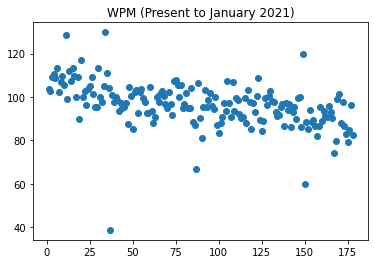

In [10]:
# code for getting my WPM over time

wpm_data = []
y_data = []

for i in range(len(mt_df.index)):
    y_data.append(i+1)

for index in mt_df.index:
    wpm_data.append(mt_df['wpm'][index])

plt.scatter(y_data, wpm_data)
plt.title('WPM (Present to January 2021)')
plt.show()

## The All-Important Question - Has my WPM Improved Over Time?

The whole reason I am analyzing this data is for me to find out if I have become a better typer. To best analyze this, I will test this hypothesis:

> Is my average typing speed from April to now greater than my average typing speed from Jan-March?


To do this, I will need appropriate null and alternative hypotheses. I will use a subscript $1$ to correspond to the typing tests from Jan-March and a subscript $2$ to correspond to the typing tests from April to present. 

* $H_0: \mu_2 \le \mu_1$
* $H_a: \mu_2 > \mu_1$


I am going to use a level of significance $\alpha = 0.01$ and a test statistic for an independent two-sample. This test will be one-tailed. In the following code, I will get the appropriate data and use `scipy` to get the appropriate test statistics:

In [13]:
# iterate through the entire dataframe to build up the WPM lists
data_1 = []
data_2 = []


for index in mt_df.index:
    if (mt_df['timestamp'][index].month <= 3):
        data_1.append(mt_df['wpm'][index])
    else:
        data_2.append(mt_df['wpm'][index])

t, p = stats.ttest_ind(data_1, data_2)
print('test statistic:', t)
print('p-value:', p)

test statistic: -6.122803811454081
p-value: 5.829530835898586e-09


Since the p-value that we received is larger/smaller than our significance level $\alpha = 0.05$, we will reject/not reject $H_0$. This means that my average words per minute did/did not improve after three months of typing tests.